#Intro
Jon Messier

2/8/2023

#Problem Statement
A house flipping company would like to identify underpriced homes by comparing asking prices to predicted sale prices.   They would like to segment homes into groups to analyze what kinds of homes there are. They would also like a model that predicts the selling price of a home.

The company has provided publicly available data from the King County Assessor's office to use for clustering and prediction.
Data notes:

BrickStone is the percentage of a house that is made of brick or stone.

# Part 1: Clustering instructions:

The house flipping company would like you to segment the homes sold in the database and create an analytical report on the clusters describing each cluster and describing how they are different. The data has had some cleaning work to it, but you should verify that it is ready for clustering.

- [x]    [Load this dataset for clustering](https://docs.google.com/spreadsheets/d/e/2PACX-1vSz2GYT82APb1iS8n07ZXi5C3WsKNEZ7lZu2RPUfHi_ZDZb1A2tmBIQyuQvJf9GbHgTNp2WXj2H6ZHC/pub?output=csv)
- [x]    Explore the data and clean it as needed.
- [x]    Prepare the data for modeling
- [x]    Use a KMeans model to cluster the houses into an optimal number of clusters.
- [x]        Use an elbow plot and silhouette score to find the optimal number of clusters.
- [x]        There must be between 2 and 10 clusters.
- [x]        Explain your choice of the number of clusters.
- [x]    Analyze and report on the clusters.
- [x]        Create 2 report quality explanatory visualizations showing important differences between the clusters.
- [x]        Interpret and explain each visualization.

##Data Dictionary
No dictionary provided

##Class/Data Import

###Imports

In [ ]:
import pandas as pd
import numpy as np
#style options
#pd.set_option('max_columns', 100)
#pd.set_option('max_rows', 100)
#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Regression Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
#Tensorflow Metrics
from tensorflow.keras.metrics import RootMeanSquaredError

#encoding/scaling
from sklearn.preprocessing import StandardScaler

#KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Pipelines/Selectors
from sklearn.pipeline import make_pipeline
#display as diagrams
from sklearn import set_config
set_config(display='diagram')

#PCA
from sklearn.decomposition import PCA

#Train Test Split
from sklearn.model_selection import train_test_split

#Neural Network imports
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


# Set random seeds for consistent outcomes
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

##Load Data

In [ ]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vSz2GYT82APb1iS8n07ZXi5C3WsKNEZ7lZu2RPUfHi_ZDZb1A2tmBIQyuQvJf9GbHgTNp2WXj2H6ZHC/pub?output=csv"
df1 = pd.read_csv(url)

##Custom Functions

###`df_inspect`

In [ ]:
#Define an inspection function to report for duplicates, Nan values, shape of
#data, and datatypes. Remove duplicates.
#Use this to explain the data to the customer
def df_inspect(df):
  if df.duplicated().sum() >>0:
    print(f'The total number of duplicates are : {df.duplicated().sum()}\n')
    df.drop_duplicates(inplace=True)
    print('All duplicate entries have been removed.\n')
  print(f'There are no duplicate entries.')
  print('-----'*5)

  #Nan values
  print(f'\nThe total number of NaN-values is:{df.isna().sum().sum()}')
  if df.isna().sum().sum() > 0 :
    print(f'The NaN-values are found in the following features.\
    In Supervised ML these values must be addressed within the transformer \
    pipeline.  In Unsupervised ML we can use .fillna().  [NOTE .fillna() \
    leads to data leakage]')
    # get the count of NaN values in each column
    nan_count = df.isna().sum()
    # select only the columns with NaN values greater than 0
    cols_with_nan = nan_count[nan_count > 0].index
    # create a new dataframe with only the selected columns
    result = train[cols_with_nan].isna().sum()
    print(result)
  print('-----'*5)

  #shape
  print(f'\nThere are {df.shape[0]} rows, and {df.shape[1]} columns.')
  print(f'In Supervised ML: The rows represent {df.shape[0]} observations, \
   and the columns represent {df.shape[1]-1} features and 1 target variable.\n')
  print('-----'*5)

  print(df.info())
  print(f'\nThe column names are:\n {df.columns}')
  print('-----'*5)
  #describe data distribution
  print(f'The distribution of data looks like the following. Outliers in numeric data should be addressed.  Also note categorical distributions of values')
  print(df.describe(include="all"))

###`plot_history`
Used to show the history of the Neural Netowrk test and train loss with respect to the given metrics

In [ ]:
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

###`eval_regression`
Used to get the scores from a regression model. When looking at variations of models, use this function and append the returned scores to a DF to show the results of all models.



In [ ]:
def eval_regression(model,X,y, title):
    """Create a prediction by fitting the model to the X.
    Compare to the true value, y, and calculate metrics.
    return a DF with the scores"""
    scores = pd.DataFrame()
    pred = model.predict(X)


    scores['Model Name'] = [title]
    scores['MSE'] = mean_squared_error(y, pred)
    scores['RMSE'] = [np.sqrt(mean_squared_error(y, pred))]
    scores['MAE'] = [mean_absolute_error(y, pred)]
    scores['R2'] = [r2_score(y, pred)]
    scores.set_index('Model Name', inplace=True)

    return scores

###`eval_classification`

In [ ]:
def eval_classification(true, pred, name='Model'):
  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['Accuracy'] = accuracy_score(true, pred),
  scores['Precision'] = precision_score(true, pred),
  scores['Recall'] = recall_score(true, pred),
  scores['F1 Score'] = f1_score(true, pred)

  return scores

##Data Inspection

In [ ]:
df_inspect(df1)

The total number of duplicates are : 29

All duplicate entries have been removed.

There are no duplicate entries.
-------------------------

The total number of NaN-values is:0
-------------------------

There are 4915 rows, and 22 columns.
In Supervised ML: The rows represent 4915 observations,    and the columns represent 21 features and 1 target variable.

-------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4915 non-null   int64  
 1   SqFt1stFloor        4915 non-null   int64  
 2   SqFtHalfFloor       4915 non-null   int64  
 3   SqFt2ndFloor        4915 non-null   int64  
 4   SqFtUpperFloor      4915 non-null   int64  
 5   SqFtTotLiving       4915 non-null   int64  
 6   SqFtTotBasement     4915 non-null   int64  
 7   SqFtFinBasement     4915 non-null   int64  
 8   SqFtGarag

###Inspection Summary and corrections

>Summary of inspection
 - [x] Duplpicates have been pre-cleaned
 - [x] No NaN values
 - [x] No typos in column names [trailing spaces, no strange characters]
 - [x] No categorical inconsistancies...there are no catergorical datatypes
 - [x] Data distribution looks reasonable.  Some outlier verification questions for the stakeholders
  - [x] Is the a value of 300 for `sqftTotLiving` a real number?  Seems awefully small
  - [x] Can the `SqFtDeck:1940` be verified?  That is a huge deck!

###Target Variable
The target variable is the `SalePrice` this is a numeric value and therefore

will require regression analysis, metrics, regularization.

In [ ]:
target ="SalePrice"

##KMeans Clustering Data
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous the data points are within the same cluster.

I will use an Elbow plot and Silhoutte score plot technique to determine the optimal number of clusters.  

- [x] Data must be scaled before fitting to KMeans


###Scale, Fit, and transform data

In [ ]:
#instantiate Standard scaler
scaler = StandardScaler()
#Fit and Transform the data
df1_scaled = scaler.fit_transform(df1.copy())

###Elbow Plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

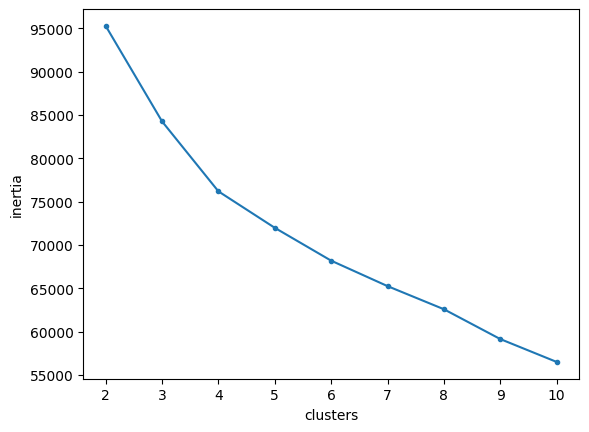

In [ ]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df1_scaled)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

>When evaluating an Elbow plot, I am looking for dramatic (elbow-like) bends in the inertia:clusters.  Here, the bends are not very clear.  If I had to guess I would say at 4 clusters we see a bend.  Let's verify with a Silhoutte score plot

###Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

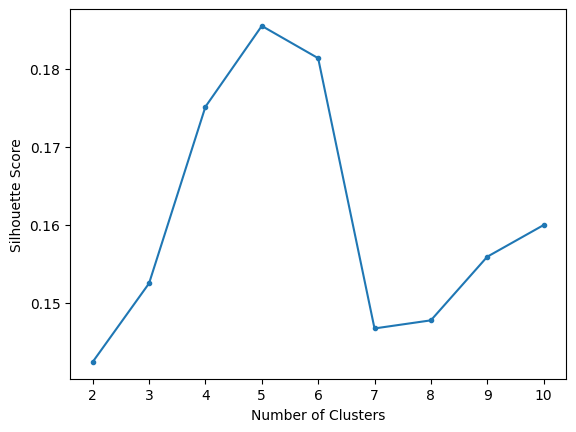

In [ ]:
#Create an empty list of Silouette Scores
sil_scores = []
#Loop through i values between 2 and 11 and store the sil_scores in the list.
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df1_scaled)
  sil_scores.append(silhouette_score(df1_scaled,kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), sil_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

>When analyzing Silhouette scores we are looking for the number of clusters that produces the highest score.    Where our elbow plot was ambiguous the Sil score plot has a distinct peak at `n_clusters=5`

##Refit KMeans with Optimal `n_clusters`
The value for the optimal number of clusters is determined by the Silhouette Score above.

A column will be added to the data to indicate the cluster number

In [ ]:
optimal_clusters = 5

In [ ]:
  # Refit KMeans with 5 clusters
  kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
  kmeans.fit(df1_scaled)

  # Add the clusters as a column in the dataframe
  df1['cluster'] = kmeans.labels_
  df1.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude,cluster
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,220,0,6,0,2,1,1965,-122.196399,47.336118,2
1,474250,1390,0,0,0,2200,810,810,0,0,...,340,0,4,1,0,1,1945,-122.361913,47.509874,2
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,4,1,0,2,2019,-122.156684,47.437557,4
3,659000,660,0,540,0,1820,620,620,0,0,...,100,0,3,1,0,2,2016,-122.370252,47.565146,1
4,656500,2310,0,0,0,2310,0,0,0,440,...,320,0,3,0,0,2,1967,-122.184194,47.730389,3


##Evaluate Clusters

Suggestions:
1. Maximums, minimums, medians, standard deviations, quartiles, and other statistics about clusters can also be helpful in understanding them.  I especially like standard deviation because it gives a sense of how diverse or homogenous a cluster is.  Another interesting number would be how many samples fall into each cluster.  Do 90% fall into cluster 1?  You should consider exploring more statistics about your data."

In [ ]:
df1['cluster'].value_counts()

3    1860
2    1327
1     827
4     708
0     193
Name: cluster, dtype: int64

###Cluster Explanatory Analysis
KMeans has divided our data into 5 distinct clusters based on their relative distance in an 22-dimensional space representing the scaled feature set.  The cluster number was then added back to the original dataset for review.  Clustering data helps us understand the commonality between entries that we cannot calculate on our own.

In the first visualization I create a box plot for each cluster.  Box plots are helpful because they show us the median value, and the range of data around the median.  Outliers are shown as diamonds outside the ranges 25% and 75% quartiles.  Visualizing the data in this way allows me to quickly see how clusters compare for each feature.

Let's look at the 2nd floor square footage to see how these plots work:

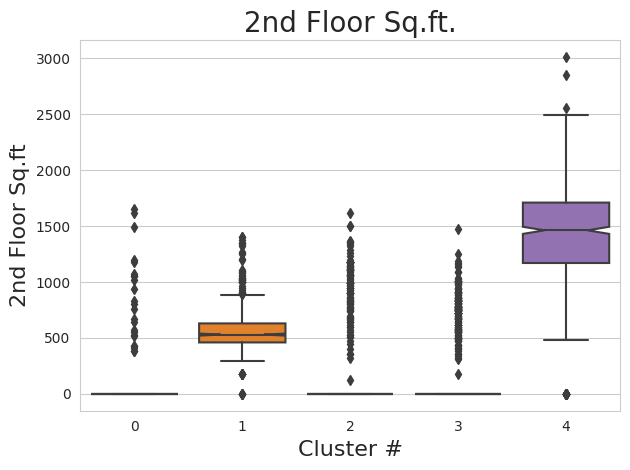

In [ ]:
sns.set_style("whitegrid")
fl2sqft = sns.boxplot(data = df1, y="SqFt2ndFloor",x='cluster',notch=True)
fl2sqft.set_title("2nd Floor Sq.ft.", fontsize=20)
plt.xlabel("Cluster #", fontsize=16)
plt.ylabel("2nd Floor Sq.ft", fontsize=16)
plt.tight_layout()

Here we see the Median 2nd Floor square footage for clusters -0/-2/-3 is 0, represented by a horizontal line.  There is no distribution about the median which indicates almost all of the houses in this clusters have 0 for a value.  We do have outliers in each of these categories represented by diamonds above the median.  In general when we are talking about clusters -0/-2/-3 we are looking at single story houses.

If we look at clusters -1/-4 we see that the median 2nd floor square footage is ~500 and 1500, respectively.  The clusters have narrow distributions about the mean and outliers on the high and low ends of the dataset.  When we are thinking about clusters -1/-4 we are looking at 2+ stories houses. In the case of cluster 1 we will show these are likely 'row'-style homes (tall, narrow, multiple floors).  Cluster 4 have large 2nd floors. These are likely large 2 story homes.

If we look at box plots for all the features, we can create a general understanding of each cluster.  
  

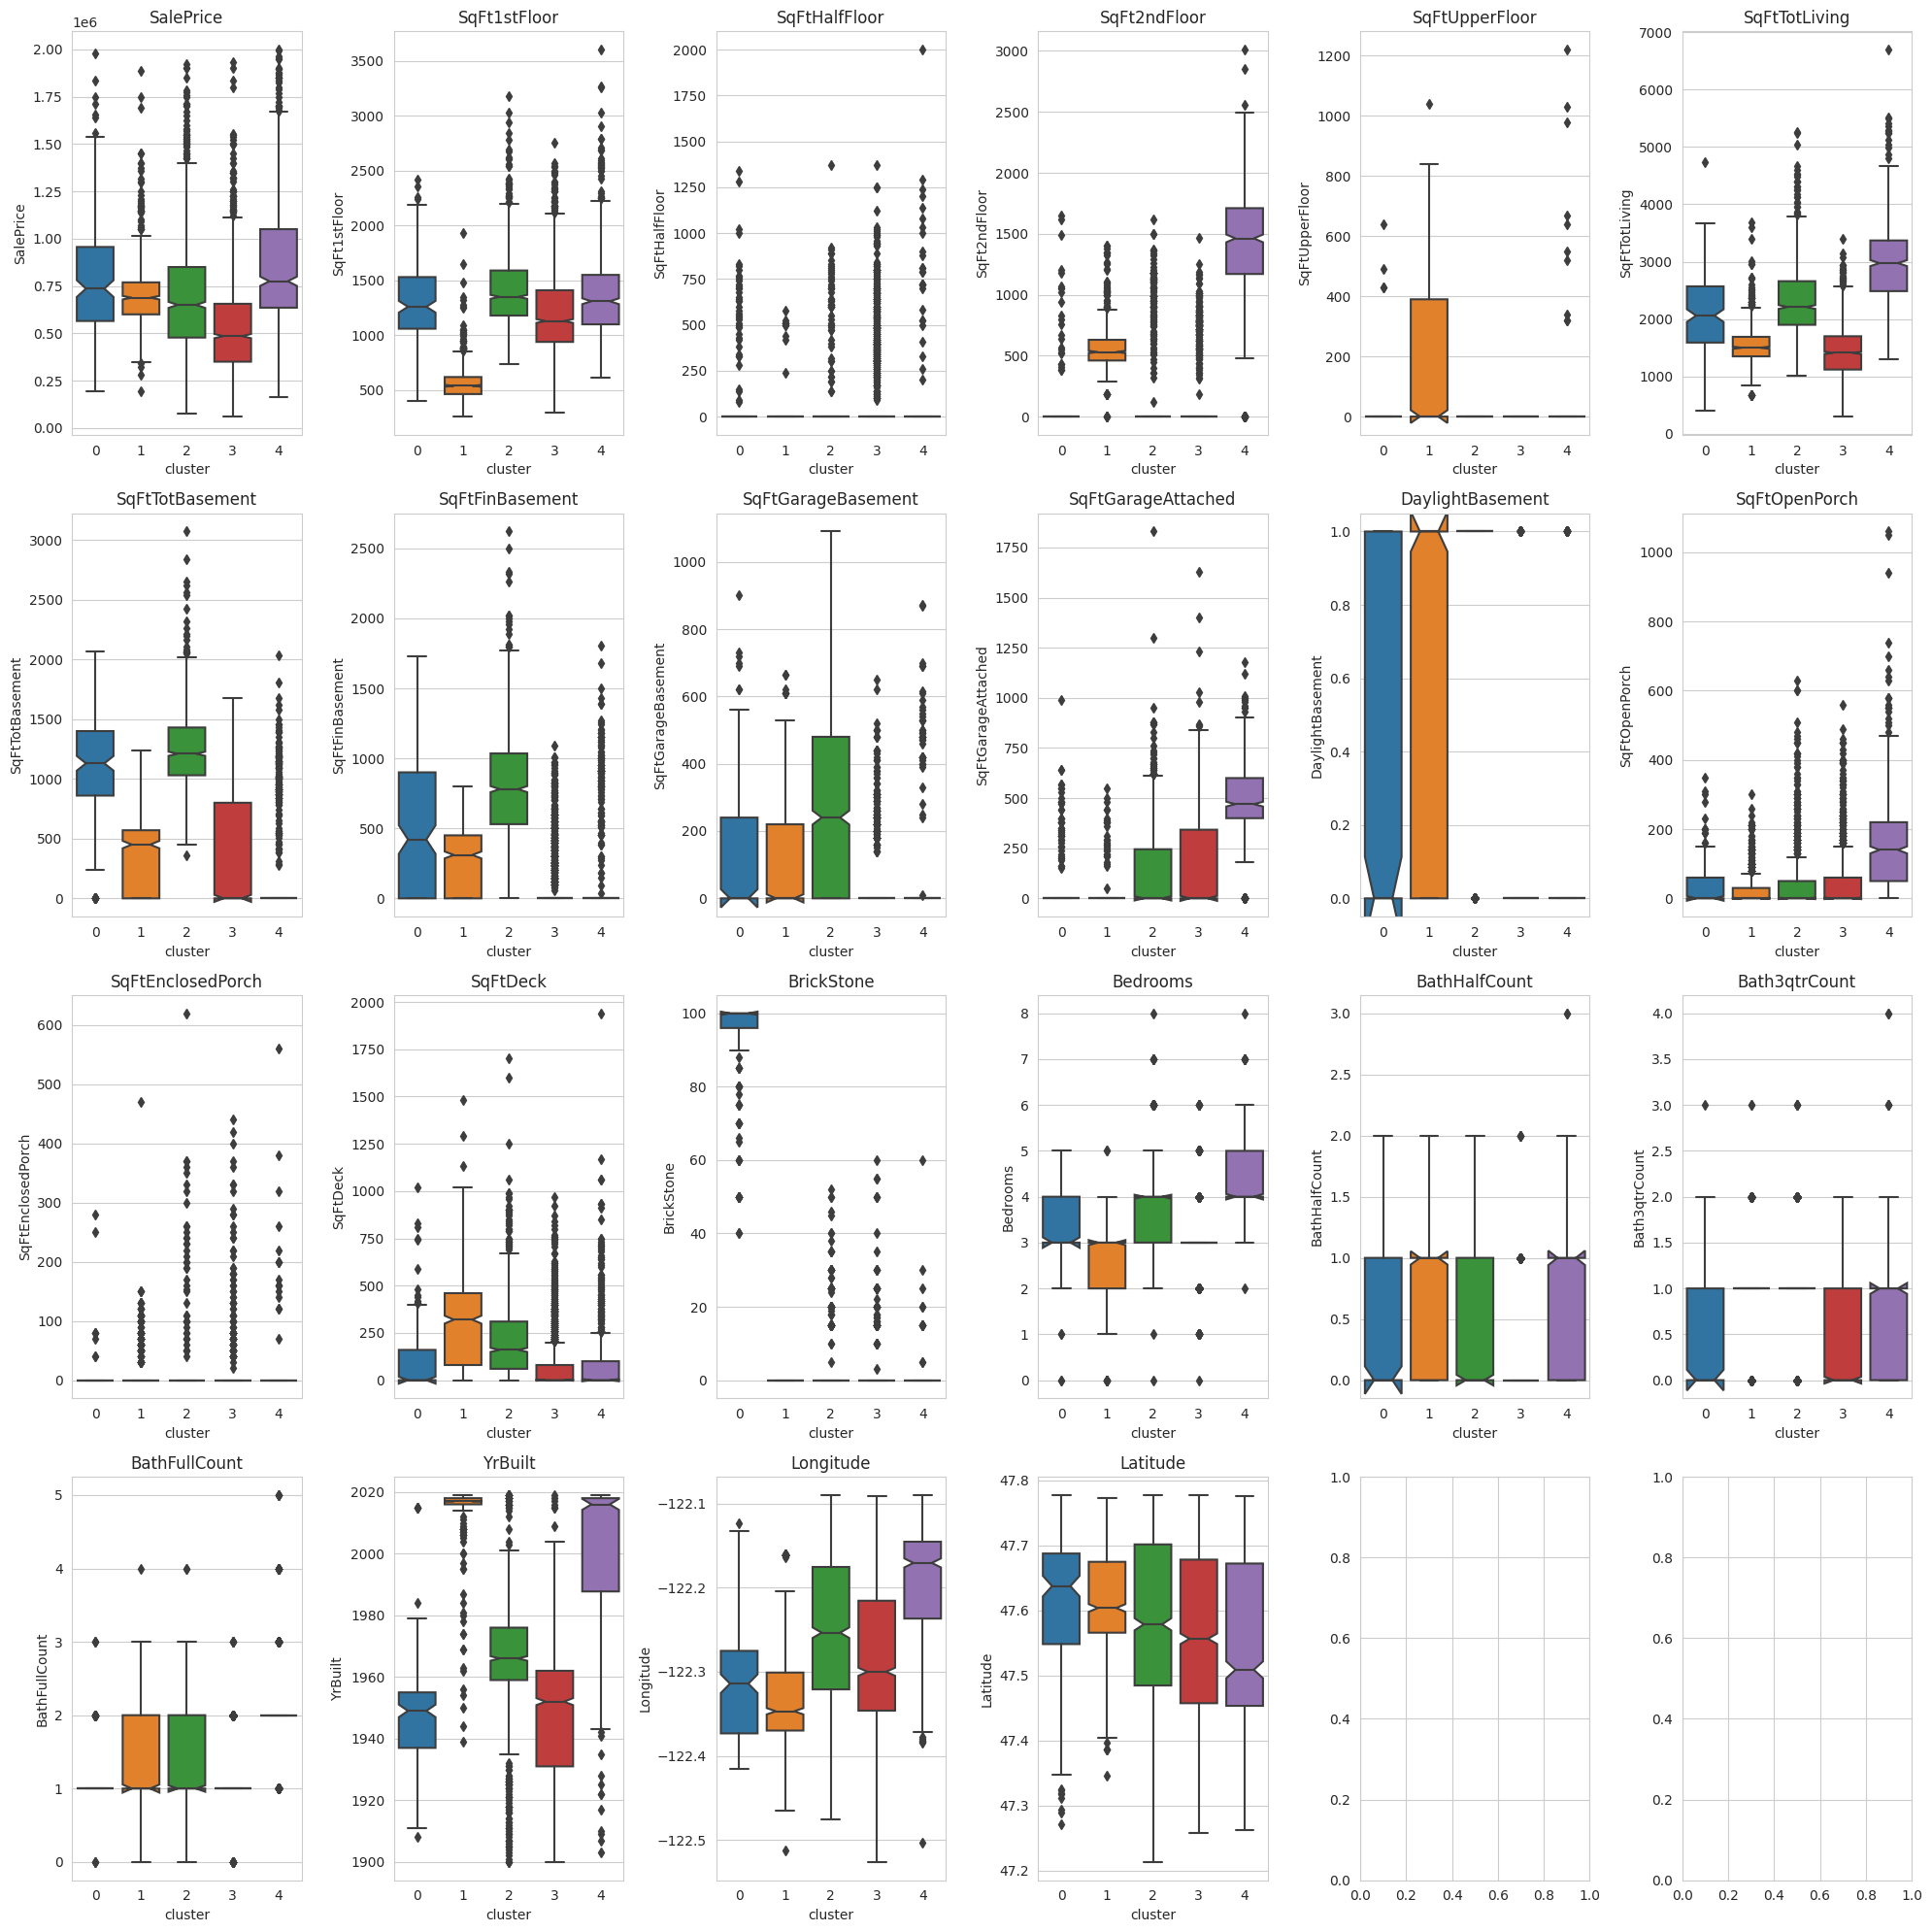

In [58]:
#Look at all features as boxplots
fig, axes = plt.subplots(4,6, figsize = (20, 20))

# fig is an array of dimensions 4,6.  axes.ravel() will flatten it to 24,1
axes = axes.ravel()

for i, col in enumerate(df1.columns):
  if col != "cluster":
    axes[i]=sns.boxplot(data = df1, y=col,x='cluster',notch=True, ax = axes[i])
    axes[i].set_title(col)
plt.tight_layout()


###Observations
This is a lot of intersting data!  Comparing all the features for every cluster would take a lot of time.  Instead, I will try to highlight details which make these clusters unique.  Of course this would be modified through communication with the stakeholder identifying which features they deem important.

####Cluster 0
- 2nd highest median sale price.  Median = $736k
- 3rd highest total living sq ft.
- Almost exclusively represented by Brickstone fascade
- Built between 1940 and 1955

####Cluster 1
- 3rd highest median sale price. Median = $688K
- Overall low sq.ft. with lowest sq.ft on 1st, and 2nd floor, but having the most sq ft. on the 3rd floor compared to other clusters.  Are these row-homes?
- Lowest number of bedrooms with a median of 2.  Per
- Newest construction of any cluster with a median year built of 2017

####Cluster 2
- 4th highest sale price. Median = $650k
- 2nd highest total sq ft. Mdeian = 2210sqft
- Largest overall finished basement. Median = 780sq.ft.
- 2nd highest median bedrooms:4

####Cluster 3
- Lowest Median price $485K
- Lowest total sq ft. Median = 1410
- 3 bedroom / 1 bath house.  low variation and few outliers to this description
- built between 1900 and early 2000s

####Cluster 4
- Highest median price $775K
- Largest total living space and largest 2nd floor space.
- Largest attached garages. Median 470sqft
- 2nd newest houses built from 1990-present
- Highest bedroom count. Median=4
- highest median bathroom count. Median = 2

In [ ]:
df1.groupby('cluster', as_index=False).median()

,cluster,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,0,736000.0,1260.0,0.0,0.0,0.0,2060.0,1130.0,420.0,0.0,...,0.0,0.0,100.0,3.0,0.0,0.0,1.0,1949.0,-122.314222,47.637540
1,1,688000.0,540.0,0.0,530.0,0.0,1500.0,450.0,310.0,0.0,...,0.0,320.0,0.0,3.0,1.0,1.0,1.0,2017.0,-122.346981,47.603897
2,2,650000.0,1350.0,0.0,0.0,0.0,2210.0,1210.0,780.0,240.0,...,0.0,160.0,0.0,4.0,0.0,1.0,1.0,1966.0,-122.253637,47.578769
3,3,485000.0,1130.0,0.0,0.0,0.0,1410.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1952.0,-122.300076,47.556595
4,4,774950.0,1310.0,0.0,1462.0,0.0,2975.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,2.0,2016.0,-122.170711,47.508895


##Map the clusters
I am interested to see how the physical location impacts the clustering.  To do this I extract the Longitude and Latitude for each cluster and save to a CSV with the index.  I use Google Maps to upload the coordinates as layers corresponding to the clusters.  Sweet!  Now I have a map that I can play with to look at how the clusters are organized georgraphically. Clicking a pin drop gives you the data index number to cross-reference the dataset

Check out the map [HERE](https://www.google.com/maps/d/edit?mid=1ZriYWl4i3DxcqitmEPYNQBdt_uhY7Uk&usp=sharing)

![png](https://drive.google.com/uc?id=1BoMqsCkwJSGzPfOStOCHhcqVLA2lKMdv)

In [ ]:
c0 = df1[df1["cluster"]==0]
c0_coords = c0[["Longitude","Latitude"]]
c0_coords.to_csv('c0_long_lat.csv', index=True)

c1 = df1[df1["cluster"]==1]
c1_coords = c1[["Longitude","Latitude"]]
c1_coords.to_csv('c1_long_lat.csv', index=True)

c2 = df1[df1["cluster"]==2]
c2_coords = c2[["Longitude","Latitude"]]
c2_coords.to_csv('c2_long_lat.csv', index=True)

c3 = df1[df1["cluster"]==3]
c3_coords = c3[["Longitude","Latitude"]]
c3_coords.to_csv('c3_long_lat.csv', index=True)

c4 = df1[df1["cluster"]==4]
c4_coords = c4[["Longitude","Latitude"]]
c4_coords.to_csv('c4_long_lat.csv', index=True)

#Part 2: Modeling

The house flipping company has provided new data about when the homes were sold and what businesses are nearby.  This new data has created a very large number of columns as the businesses, months sold, and years sold are all one-hot encoded.  

They would like you to use this new dataset to create a deep learning model that predicts the likely sale price for a new home coming to market.

Note: SalePrice is your target variable

- [x]   [Load this dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vTxMmEUoF3Eec9wzhbwUx4ZFKvKuU609sPDDxlhhfs12w7CophWZScqTnrcw3sXWlG8m18HN_kzf8lI/pub?output=csv) for modeling  **This is a different data set than used for part 1!**   This file is large, make sure to wait for it to fully upload before loading it into your dataframe
- [x]    This dataset is pre-cleaned but may need to be processed before modeling.  
- [x]    Use random_state = 42 for your train_test_split
- [x]    Use PCA to prepare the data for modeling.
- [x]        Reduce the number of features in the data
- [x]        Be sure to use the PCA-transformed data when you fit and validate your deep learning model.
- [x]    Do not leak data while preparing your data for modeling.
- [x]    Use a deep learning model to predict the sale price of each house.
 - [x]        Use the PCA-transformed data you created in Step 4.
 - [x]        Create 3 different versions of a sequential model.
  - [x]           Each new model should be an iteration of the previous model.
  - [x]            Justify in writing why you changed what you did for each new model. (For example, why did you add layers, regularization, nodes, etc)
  - [x]            Adding or reducing epochs does not count as a new model.
  - [x]      Use some form of regularization with at least one model.
  - [x]      Evaluate each model with multiple appropriate metrics.
- [x]    Choose a final model and justify your choice.
- [x]    Evaluate your final model with multiple metrics.
- [x]    Based on those metrics, explain in writing how well your model will solve the business problem.

##Load and inspect Data

In [ ]:
url2 = ("https://docs.google.com/spreadsheets/d/e/2PACX-1vTxMmEUoF3Eec9wzhbwUx4ZFKvKuU609sPDDxlhhfs12w7CophWZScqTnrcw3sXWlG8m18HN_kzf8lI/pub?output=csv")
df2= pd.read_csv(url2)

In [ ]:
df2.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df_inspect(df2)

There are no duplicate entries.
-------------------------

The total number of NaN-values is:0
-------------------------

There are 4937 rows, and 171 columns.
In Supervised ML: The rows represent 4937 observations,    and the columns represent 170 features and 1 target variable.

-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB
None

The column names are:
 Index(['SalePrice', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'SqFtGarageBasement', 'SqFtGarageAttached',
       ...
       'MonthSold_07', 'MonthSold_08', 'MonthSold_09', 'MonthSold_10',
       'MonthSold_11', 'MonthSold_12', 'YearSold_2017', 'YearSold_2018',
       'YearSold_2019', 'YearSold_2020'],
      dtype='object', length=171)
-------------------------
The distribution of data looks 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB


In [ ]:
df2.isna().sum().sum()

0

##Model type - identification
The goal of this model is to predict the sales price.  SalePrice is a continuous numerical value which tells us this is a regression problem.  This implies:
- activation = 'relu'
- regularization = 'linear'
- loss = 'mse'



##Score Card for Neural Networks
Regression metrics for evaluting the Neural networks (NN) will be stored in a datafram and evaluted as changes are made to the NN.  For this problem, I will record the Mean Squared Error (MSE), Mean Average Error (MAE), Root Mean Squared Error (RSME) and R^2 values.  The evaluation metrics will be calculated using `eval_regression` function defined above.

In [ ]:
#Create a scorecard for all the neural networks
score_card = pd.DataFrame()

In [ ]:
df2[target].dtype

dtype('int64')

##Train Test Split

In [ ]:
len(df2[target])

4937

In [ ]:
X = df2.drop(target, axis =1)
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Preprocessor
No column encoders or imputers needed as data has been pre-processed.  We just need to scale and fit

###StandardScaler/PCA Pipeline
For Neural Network modeling, data must be scaled.  The StandardScaler is used here.

This dataset contains 170 columns of information.  Reducing the number of rows will improve modeling time.  I will use Primary Component Anylsis to reduce the columns while mainting a 95% explained variance.  This results in a reduction of 27 columns of data

A pipline is created to scale and apply PCA to the data in one process.

In [ ]:
# We must scale the data for use in PCA
scaler = StandardScaler()

# We are asking for the number of Principal Components that will retain 95% of the variance in the original features
pca = PCA(n_components = .95)

# Preprocessing Pipeline, so we can reuse it for other model types:
# We have only numeric data, so there is no need for a column transformer.
# We can perform the same processing steps on all columns.
pca_processing = make_pipeline(scaler, pca)

print('Shape before PCA:', X_train.shape)
print('Shape after PCA:', pca_processing.fit_transform(X_train).shape)
print('Column count reduced by: ', X_train.shape[1] - pca_processing.fit_transform(X_train).shape[1])

Shape before PCA: (3702, 170)
Shape after PCA: (3702, 143)
Column count reduced by:  27


Fit the training data to the preprocessing pipeline, then transform the training and test data.

In [ ]:
#Fit the model to the X_train data
pca_processing.fit(X_train)

#Transform the X_train and X-test by the fit preprocessor
X_train = pca_processing.transform(X_train)
X_test = pca_processing.transform(X_test)

##Neural Network 1
This is the most basic model.  There is an input layer with RELU activation and an output layer with linear activation since this is a regression problem.  

In [ ]:
# Set Random Seeds
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate your sequential model
model_1 = Sequential()

# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add input layer
model_1.add(Dense(10, activation='relu', input_dim=input_dim, name='input'))

# Add output layer with 1 node
model_1.add(Dense(1, activation='linear', name ='output'))


# Check summary of network
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                1440      
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 1451 (5.67 KB)
Trainable params: 1451 (5.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Compile
Compile with `adam` optomizer and loss calculated with Mean Squred Error (MSE).

In [ ]:
rmse = RootMeanSquaredError(name='rmse')
model_1.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

###Train

In [ ]:
# Fit the model amd get track the loss values
history = model_1.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 100,verbose=0)

###Evaluate

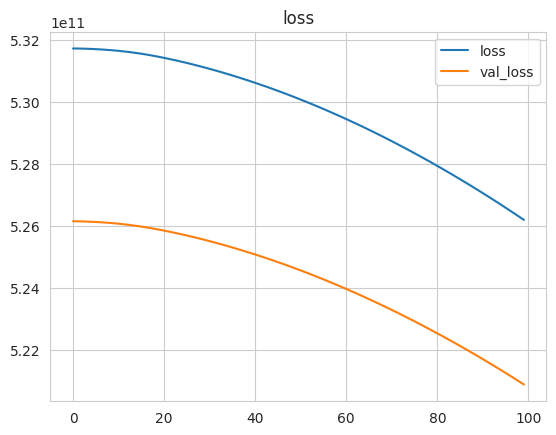

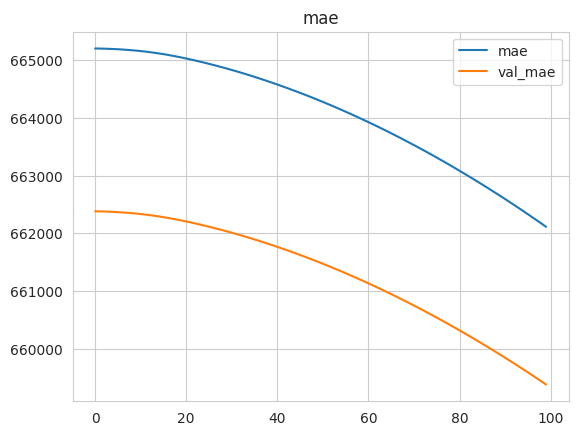

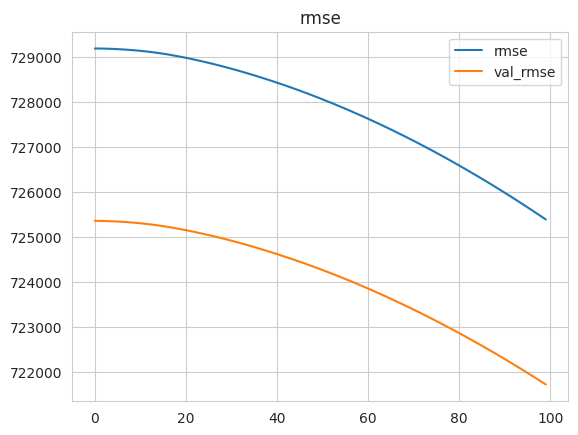

In [ ]:
# Apply the custom function to see how your model is doing
plot_history(history)

In [ ]:
#Evaluate Regression metrics using eval_regression.
#Append to the scorecard for comparisons a the end
m1_train_scores = eval_regression(model_1, X_train, y_train, title='Model_1 Train')
m1_test_scores = eval_regression(model_1, X_test, y_test, title='Model_1 test')
score_card = score_card.append(m1_train_scores)
score_card = score_card.append(m1_test_scores)

print(score_card.head())

39/39 [==============================] - 0s 1ms/step
                        MSE           RMSE            MAE        R2
Model Name                                                         
Model_1 Train  5.261357e+11  725352.138491  662083.626038 -4.896915
Model_1 test   5.208794e+11  721719.747499  659379.393674 -4.959999


<ipython-input-35-bcc4d4f04ebb>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(m1_train_scores)
<ipython-input-35-bcc4d4f04ebb>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(m1_test_scores)


>This model is a very simple NN and results in high bias.  This is evidenced by the separation bewteen train and test data.
>
>In the next model I will add 2 more layers to increase complexity and hopefully reduce the bias.

##Neural Network 2
NN2 is NN1 plus 2 identical layers to the input layer

In [ ]:
# Set Random Seeds
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate your sequential model
model_2 = Sequential()

# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add input layer
model_2.add(Dense(10, activation='relu', input_dim=input_dim, name='input'))

# Add hidden layer
model_2.add(Dense(10, activation='relu', name='h1'))

# Add hidden layer
model_2.add(Dense(10, activation='relu', name='h2'))

# Add output layer with 1 node
model_2.add(Dense(1, activation='linear', name ='output'))


# Check summary of network
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                1440      
                                                                 
 h1 (Dense)                  (None, 10)                110       
                                                                 
 h2 (Dense)                  (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 1671 (6.53 KB)
Trainable params: 1671 (6.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Compile

In [ ]:
model_2.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

###Train

In [ ]:
# Fit the model amd get track the loss values
history = model_2.fit(X_train, y_train,validation_data = (X_test, y_test),epochs = 100,verbose=0)

###Evaluate

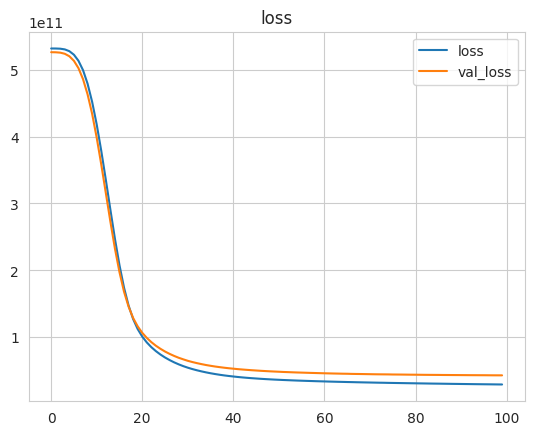

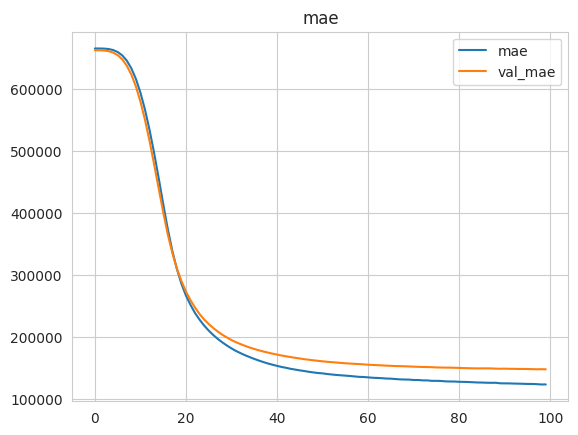

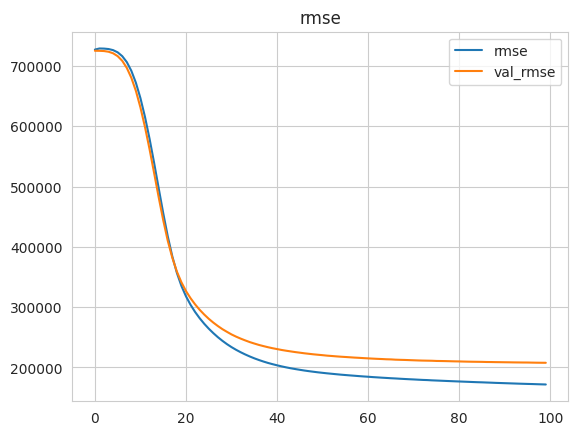

In [ ]:
# Apply the custom function to see how your model is doing
plot_history(history)

In [ ]:
#Evaluate Regression metrics using eval_regression.
#Append to the scorecard for comparisons a the end
m2_train_scores = eval_regression(model_2, X_train, y_train, title='Model_2 Train')
m2_test_scores = eval_regression(model_2, X_test, y_test, title='Model_2 test')
score_card = score_card.append(m2_train_scores)
score_card = score_card.append(m2_test_scores)

print(score_card.head())

39/39 [==============================] - 0s 1ms/step
                        MSE           RMSE            MAE        R2
Model Name                                                         
Model_1 Train  5.261357e+11  725352.138491  662083.626038 -4.896915
Model_1 test   5.208794e+11  721719.747499  659379.393674 -4.959999
Model_2 Train  2.916527e+10  170778.436814  122839.564463  0.673116
Model_2 test   4.309007e+10  207581.477561  147871.390233  0.506955


<ipython-input-40-3718c2ebd795>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(m2_train_scores)
<ipython-input-40-3718c2ebd795>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(m2_test_scores)


>In this model, we see the validation data start to diverge [orange] from the test data [blue]. This is variance. While the separation that occurs near epoch=20 is not very large, it looks like it continues to expand with each epoch. Let's look at what happens over 1000 epochs instead to see if the variance increases.

##Neural Network 2 - 1000 epochs
NN2 is NN1 plus 2 identical layers to the input layer
- Run for 1000 epochs to show the slow increase in variance

In [ ]:
# Set Random Seeds
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate your sequential model
model_2 = Sequential()

# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add input layer
model_2.add(Dense(10, activation='relu', input_dim=input_dim, name='input'))

# Add hidden layer
model_2.add(Dense(10, activation='relu', name='h1'))

# Add hidden layer
model_2.add(Dense(10, activation='relu', name='h2'))

# Add output layer with 1 node
model_2.add(Dense(1, activation='linear', name ='output'))


# Check summary of network
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                1440      
                                                                 
 h1 (Dense)                  (None, 10)                110       
                                                                 
 h2 (Dense)                  (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 1671 (6.53 KB)
Trainable params: 1671 (6.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Compile

In [ ]:
model_2.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

###Train

In [ ]:
# Fit the model amd get track the loss values
history = model_2.fit(X_train, y_train,validation_data = (X_test, y_test),epochs = 1000,verbose=0)

###Evaluate

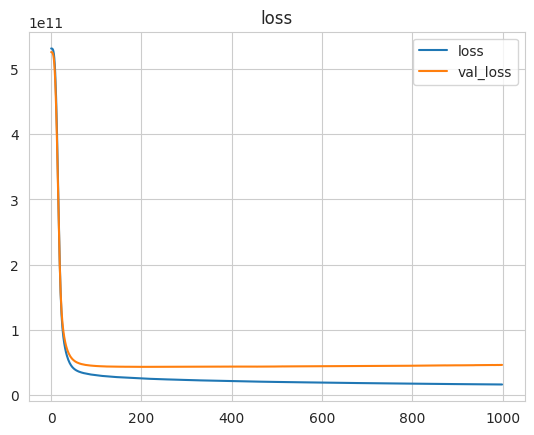

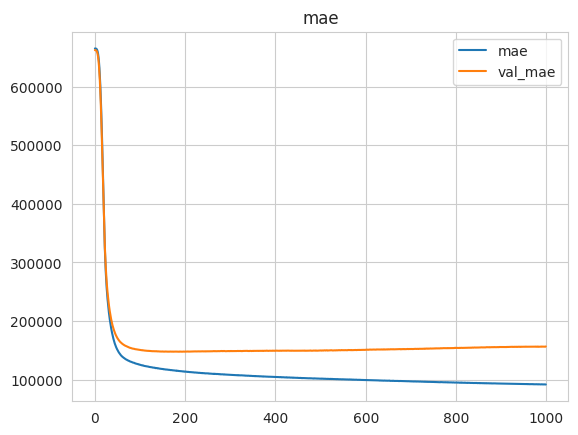

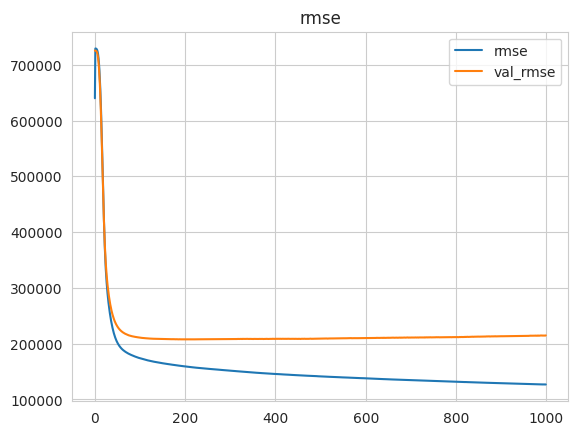

In [ ]:
# Apply the custom function to see how your model is doing
plot_history(history)

In [ ]:
#Evaluate Regression metrics using eval_regression.
#Append to the scorecard for comparisons a the end
m2_train_scores = eval_regression(model_2, X_train, y_train, title='Model_2_1000 Train')
m2_test_scores = eval_regression(model_2, X_test, y_test, title='Model_2_1000 test')
score_card = score_card.append(m2_train_scores)
score_card = score_card.append(m2_test_scores)

print(score_card[0:20])

39/39 [==============================] - 0s 2ms/step
                             MSE           RMSE            MAE        R2
Model Name                                                              
Model_1 Train       5.261357e+11  725352.138491  662083.626038 -4.896915
Model_1 test        5.208794e+11  721719.747499  659379.393674 -4.959999
Model_2 Train       2.916527e+10  170778.436814  122839.564463  0.673116
Model_2 test        4.309007e+10  207581.477561  147871.390233  0.506955
Model_2_1000 Train  1.589994e+10  126094.945132   91440.118380  0.821794
Model_2_1000 test   4.614334e+10  214810.012913  156571.535634  0.472019


<ipython-input-45-cd3ce166342d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(m2_train_scores)
<ipython-input-45-cd3ce166342d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(m2_test_scores)


>By running for 1000 epochs, we see the divergence between train and test data continue to grow.  While the magnitude of the separation isnt too large it's interesting to see how it evolves over epochs.  In this case, since the the variance continues to increase, it makes sense to add some regularization, dropout, or early stopping to see if we can improve the model further.  Let's begin with Regularization.

##Neural Network 3
NN3 has the same layer and nodes as NN2 run @ 100 epochs.  I this model, I add L1, L2 kernal regularization @20% for the 1st hidden layer.

The L1 regularization penalty is computed as: $loss = l1 * reduce sum(abs(x))$\
The L2 regularization penalty is computed as: $loss = l2 * reduce sum(square(x))$

In [ ]:
# Set Random Seeds
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate your sequential model
model_3 = Sequential()

# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add input layer
model_3.add(Dense(10, activation='relu', input_dim=input_dim, name='input'))

# Add hidden layer
model_3.add(Dense(10, activation='relu',kernel_regularizer=regularizers.l1_l2(l1= .02, l2=.2), name='h1'))

# Add hidden layer
model_3.add(Dense(10, activation='relu', name='h2'))

# Add output layer with 1 node
model_3.add(Dense(1, activation='linear', name ='output'))


# Check summary of network
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                1440      
                                                                 
 h1 (Dense)                  (None, 10)                110       
                                                                 
 h2 (Dense)                  (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 1671 (6.53 KB)
Trainable params: 1671 (6.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Compile

In [ ]:
model_3.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

###Train

In [ ]:
# Fit the model amd get track the loss values
history = model_3.fit(X_train, y_train,validation_data = (X_test, y_test),epochs = 100,verbose=0)

###Evaluate

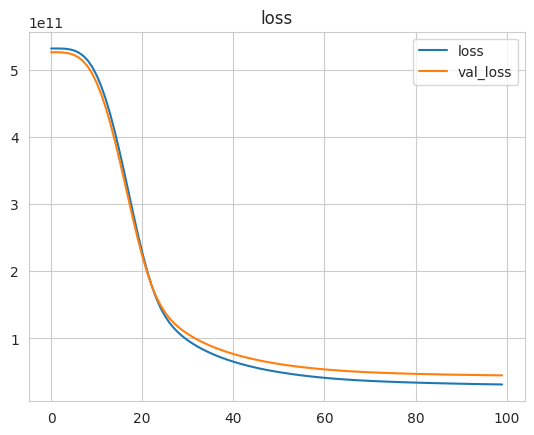

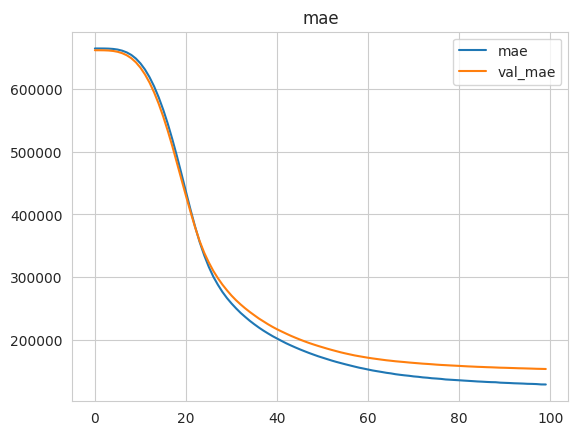

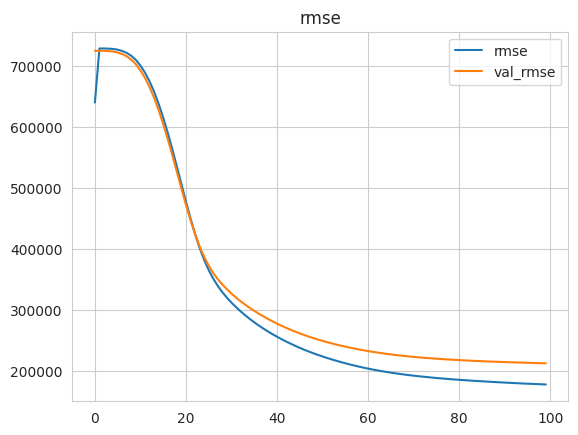

In [ ]:
# Apply the custom function to see how your model is doing
plot_history(history)

In [ ]:
#Evaluate Regression metrics using eval_regression.
#Append to the scorecard for comparisons a the end
m3_train_scores = eval_regression(model_3, X_train, y_train, title='Model_3 Train');
m3_test_scores = eval_regression(model_3, X_test, y_test, title='Model_3 test');
score_card = score_card.append(m3_train_scores);
score_card = score_card.append(m3_test_scores);

print(score_card[0:20])

39/39 [==============================] - 0s 1ms/step
                             MSE           RMSE            MAE        R2
Model Name                                                              
Model_1 Train       5.261357e+11  725352.138491  662083.626038 -4.896915
Model_1 test        5.208794e+11  721719.747499  659379.393674 -4.959999
Model_2 Train       2.916527e+10  170778.436814  122839.564463  0.673116
Model_2 test        4.309007e+10  207581.477561  147871.390233  0.506955
Model_2_1000 Train  1.589994e+10  126094.945132   91440.118380  0.821794
Model_2_1000 test   4.614334e+10  214810.012913  156571.535634  0.472019
Model_3 Train       3.128999e+10  176889.757337  127710.804437  0.649303
Model_3 test        4.509734e+10  212361.346666  153052.851414  0.483988


<ipython-input-50-c397b5b18686>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(m3_train_scores);
<ipython-input-50-c397b5b18686>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(m3_test_scores);


In this model I can see a slight improvement to the test data R2 score.  Let's try a dropout layer between the 1st (h1) and 2nd hidden layers (h2).  

##Neural Network 4
NN4 is the same as NN3 with a 20% Dropout layer between h1, and h2.
From keras.io we know:

*The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.*



In [ ]:
# Set Random Seeds
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate your sequential model
model_4 = Sequential()

# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add input layer
model_4.add(Dense(10, activation='relu', input_dim=input_dim, name='input'))

# Add hidden layer
model_4.add(Dense(10, activation='relu',kernel_regularizer=regularizers.l1_l2(l1= .02, l2=.2), name='h1'))

#Add dropout layer
model_4.add(Dropout(.2))
# Add hidden layer
model_4.add(Dense(10, activation='relu', name='h2'))

# Add output layer with 1 node
model_4.add(Dense(1, activation='linear', name ='output'))


# Check summary of network
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                1440      
                                                                 
 h1 (Dense)                  (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 h2 (Dense)                  (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 1671 (6.53 KB)
Trainable params: 1671 (6.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Compile

In [ ]:
model_4.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

###Train

In [ ]:
# Fit the model amd get track the loss values
history = model_4.fit(X_train, y_train,validation_data = (X_test, y_test),epochs = 100,verbose=0)

###Evaluate

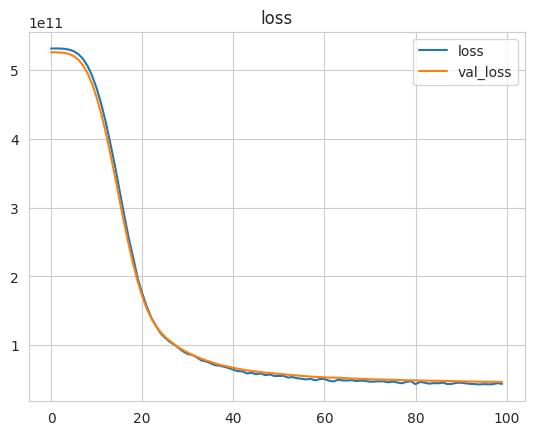

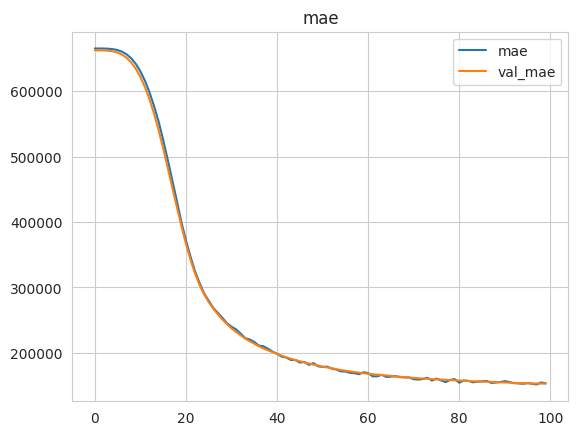

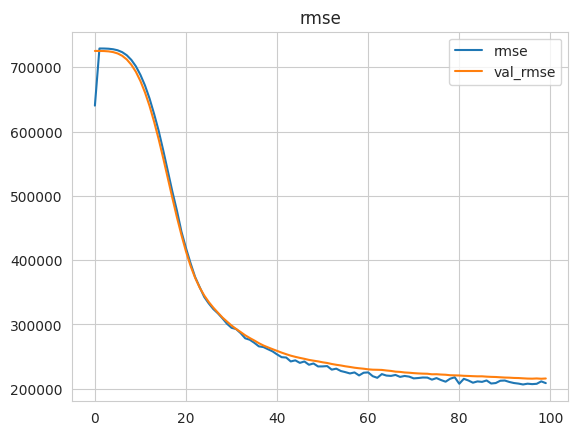

In [ ]:
# Apply the custom function to see how your model is doing
plot_history(history)

In [ ]:
#Evaluate Regression metrics using eval_regression.
#Append to the scorecard for comparisons a the end
m4_train_scores = eval_regression(model_4, X_train, y_train, title='Model_4 Train');
m4_test_scores = eval_regression(model_4, X_test, y_test, title='Model_4 test');
score_card = score_card.append(m4_train_scores);
score_card = score_card.append(m4_test_scores);

print(score_card[0:20])

39/39 [==============================] - 0s 1ms/step
                             MSE           RMSE            MAE        R2
Model Name                                                              
Model_1 Train       5.261357e+11  725352.138491  662083.626038 -4.896915
Model_1 test        5.208794e+11  721719.747499  659379.393674 -4.959999
Model_2 Train       2.916527e+10  170778.436814  122839.564463  0.673116
Model_2 test        4.309007e+10  207581.477561  147871.390233  0.506955
Model_2_1000 Train  1.589994e+10  126094.945132   91440.118380  0.821794
Model_2_1000 test   4.614334e+10  214810.012913  156571.535634  0.472019
Model_3 Train       3.128999e+10  176889.757337  127710.804437  0.649303
Model_3 test        4.509734e+10  212361.346666  153052.851414  0.483988
Model_4 Train       3.119202e+10  176612.625487  126060.200865  0.650401
Model_4 test        4.659624e+10  215861.629704  153135.173033  0.466837


<ipython-input-55-319dcebcc7cc>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(m4_train_scores);
<ipython-input-55-319dcebcc7cc>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append(m4_test_scores);


Boy, that graph looks good!  There is low variance and low bias.  When we evaluate the regression metrics, we see subtle improvement over NN3.  I do not think that adjusting the model further will yield significantly better results.  

##Recomendation
**Problem Statement:**

*Create a deep learning model that predicts the likely sale price for a new home coming to market.*

---
Using a Neural Network described as Neural Network 4 above and by:
 - 1 input layer with 10 Densely connected nodes, RELU activation
 - 1 hidden layer with 10 densely connected nodes, RELU activation, and L1 and L2 regularization
 - Dropout 20%
 - 1 hidden layer with 10 densely connected nodes, RELU activation
 - 1 Output layer with linear activation

The following results were achieved:

|Model | MSE | RMSE | MAE | R^2 |
| :---| :---|:---|:---|:---|
|Model_4 Train|       2.969582e+10|  172324.761641 | 123109.764054|  0.667170|
|Model_4 test|        4.455284e+10 | 211075.431029|  150082.983641 | 0.490218|

This model provides the highest $R^2$ value and combined with the lowest combined RMSE score. The $R^2$ value is telling us is that the model accounts for \~49% of the variance in the data.  In general, a model with a higher R^2 value closer to 1 is better, however an $R^2=1$ usually indicates overfitting.  A SME is needed to verify the strength of this metric for the dataset.  

The RMSE is telling us the root mean square absolute error (more simply thought of as the average error from the mean without +\/-) is about \$211 k$.  Since our mean home price is \$664,496.90, this error represents nearly \~+\\-30% of the value. This may or may not be helpful to our client depending on their level of financial risk and understanding of the property value.  If you could purchase a property below the predicted value less the RSME you have a high likihood of a potential profit.  Of course, the house would have to be resold and factors like interest paid, taxes, repairs are not accounted for!  This is Not Financial Advice!



# Export Dataframe for use with Streamlit

In [ ]:
#Export Dataframe to CSV
df1.to_csv("House listing data.csv",',')